In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

<IPython.core.display.Javascript object>

In [3]:
mnist = fetch_openml("Fashion-MNIST", version=1, cache=True)

<IPython.core.display.Javascript object>

In [4]:
np.random.seed(123)

indices = np.random.choice(70000, 10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


<IPython.core.display.Javascript object>

In [23]:
y.astype(int)

array([4, 7, 3, ..., 5, 9, 1])

<IPython.core.display.Javascript object>

In [24]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

class_dict = dict(enumerate(class_names))
[class_dict[label] for label in y.astype(int)]

['Coat',
 'Sneaker',
 'Dress',
 'Shirt',
 'Sandal',
 'Sneaker',
 'Bag',
 'Sneaker',
 'Bag',
 'Bag',
 'Sandal',
 'Coat',
 'Pullover',
 'Trouser',
 'Coat',
 'Trouser',
 'T-shirt/top',
 'T-shirt/top',
 'Coat',
 'Pullover',
 'Sneaker',
 'Dress',
 'Bag',
 'T-shirt/top',
 'Ankle boot',
 'Trouser',
 'Ankle boot',
 'Sandal',
 'Bag',
 'Bag',
 'Sneaker',
 'Ankle boot',
 'Sneaker',
 'Bag',
 'Coat',
 'Bag',
 'Dress',
 'Ankle boot',
 'Ankle boot',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Sneaker',
 'Pullover',
 'Dress',
 'Dress',
 'Pullover',
 'Coat',
 'Sandal',
 'Coat',
 'T-shirt/top',
 'Coat',
 'Coat',
 'Ankle boot',
 'Coat',
 'Ankle boot',
 'Dress',
 'Shirt',
 'Coat',
 'Coat',
 'Coat',
 'Bag',
 'Sneaker',
 'Dress',
 'Dress',
 'Sneaker',
 'Sandal',
 'Coat',
 'Sandal',
 'Trouser',
 'Dress',
 'Ankle boot',
 'T-shirt/top',
 'Sneaker',
 'Coat',
 'Bag',
 'Coat',
 'Shirt',
 'T-shirt/top',
 'Coat',
 'T-shirt/top',
 'Sneaker',
 'Shirt',
 'Coat',
 'Trouser',
 'Shirt',
 'Dress',
 'Ankle boot',
 'Shirt',
 'Sand

<IPython.core.display.Javascript object>

In [31]:
tsne = TSNE(n_components=2, n_jobs=-1, perplexity=80)
tsne_df = pd.DataFrame(tsne.fit_transform(X), columns=["0", "1"])

<IPython.core.display.Javascript object>

In [32]:
tsne_df["label"] = [class_dict[label] for label in y.astype(int)]

<IPython.core.display.Javascript object>

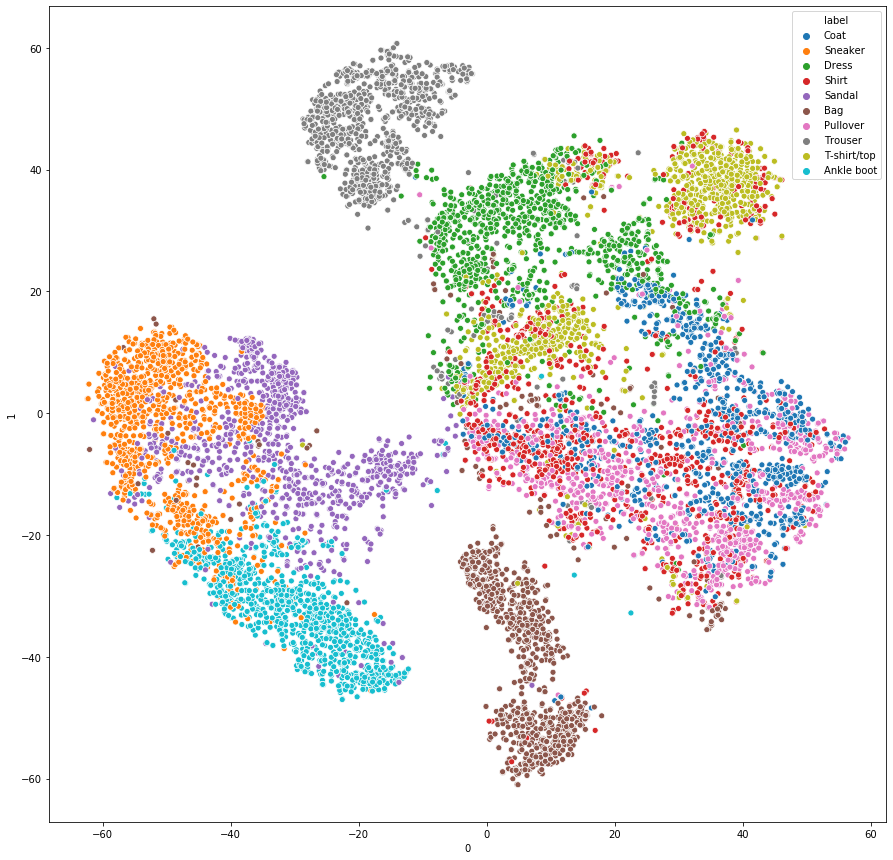

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(15, 15))
sns.scatterplot("0", "1", hue="label", data=tsne_df)

t-SNE looks great to me. Definitely a lot better than PCA. The areas that are clustered together makes sense when looking at the item type (e.g. t-shirt and shirt)